In [81]:

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import scipy.stats as stats
%matplotlib inline

#### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [2]:
df = pd.read_csv('2013_movies.csv')
df.dropna(subset=['Budget'],inplace=True)

In [3]:
df['constant_column'] = 1

In [4]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,constant_column
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1


In [5]:
#Set constant x and target y
X = df['constant_column']
y = df['DomesticTotalGross']

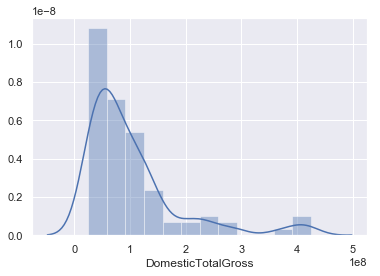

In [14]:
sns.distplot(y);

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
#Fit and score regression
lm = LinearRegression()
lm.fit(X.values.reshape(-1,1),y)
lm.score(X.values.reshape(-1,1),y)

0.0

In [8]:
lm.coef_

array([0.])

In [9]:
lm.intercept_

103045039.13483146

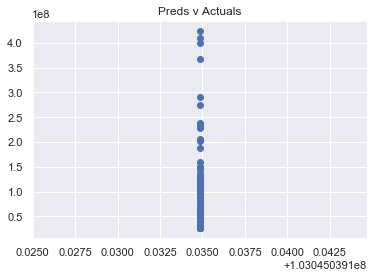

In [10]:
preds1 = lm.predict(X.values.reshape(-1,1))
plt.scatter(preds1,y)
plt.title('Preds v Actuals');

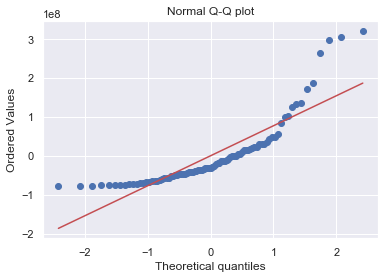

In [18]:

res1 = (y-preds1)
stats.probplot(res1, dist="norm", plot=plt)
plt.title("Normal Q-Q plot");

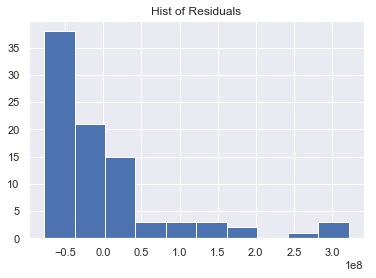

In [17]:
plt.title('Hist of Residuals')
plt.hist(res1);

Right skewed

#### Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [34]:
X2 = df[['constant_column','Budget']]
y = df['DomesticTotalGross']

In [35]:
lm2 = LinearRegression()
lm2.fit(X2,y)
lm2.score(X2,y)

0.2858138868158314

In [36]:
lm2.coef_

array([0.        , 0.78463743])

In [37]:
lm2.intercept_

44395595.18320854

Predicts base domestic gross of 44395595. increases prediction by 0.785 for every dollar added to budget

In [38]:
preds2 = lm2.predict(X2)

Text(0.5,1,'Preds v Actual')

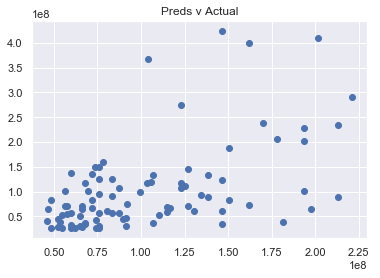

In [39]:
plt.scatter(preds2,y)
plt.title('Preds v Actual')

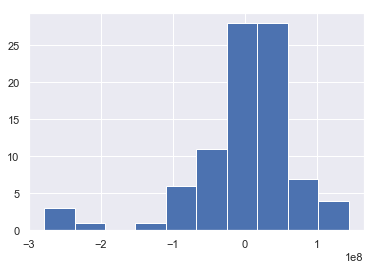

In [41]:
res2 = preds2 - y
plt.hist(res2);

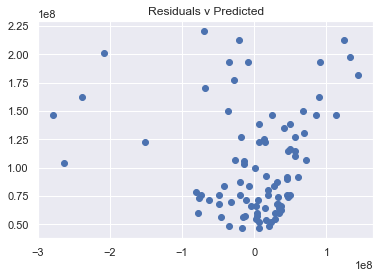

In [43]:
plt.scatter(res2, preds2)
plt.title('Residuals v Predicted');

#### Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [44]:
df = pd.concat([df, pd.get_dummies(df['Rating'])], axis=1)

In [45]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,constant_column,PG,PG-13,R
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1,0,1,0
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1,0,1,0
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1,1,0,0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1,1,0,0
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1,0,1,0


In [54]:
X3 = df[['constant_column','Budget','PG','PG-13','R']]

In [56]:
lm3 = LinearRegression()
lm3.fit(X3,y)
lm3.score(X3,y)

0.29074809089211096

In [48]:
lm3.coef_

array([ 0.00000000e+00,  7.81604382e-01,  1.03768217e+07, -6.88859250e+06,
       -3.48822917e+06])

In [49]:
lm3.intercept_

47340189.490134455

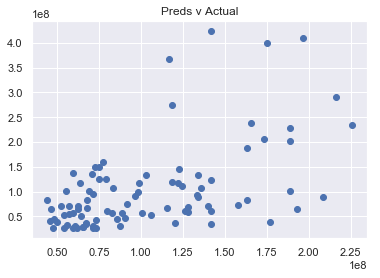

In [50]:
plt.scatter(lm3.predict(X3),y)
plt.title('Preds v Actual');

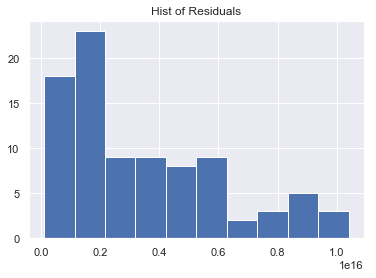

In [58]:
res3 = lm3.predict(X3) - y
plt.hist(res3)
plt.title('Hist of Residuals');

#### Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [60]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df['ReleaseMonth'] = df['ReleaseDate'].apply(lambda x: x.month)

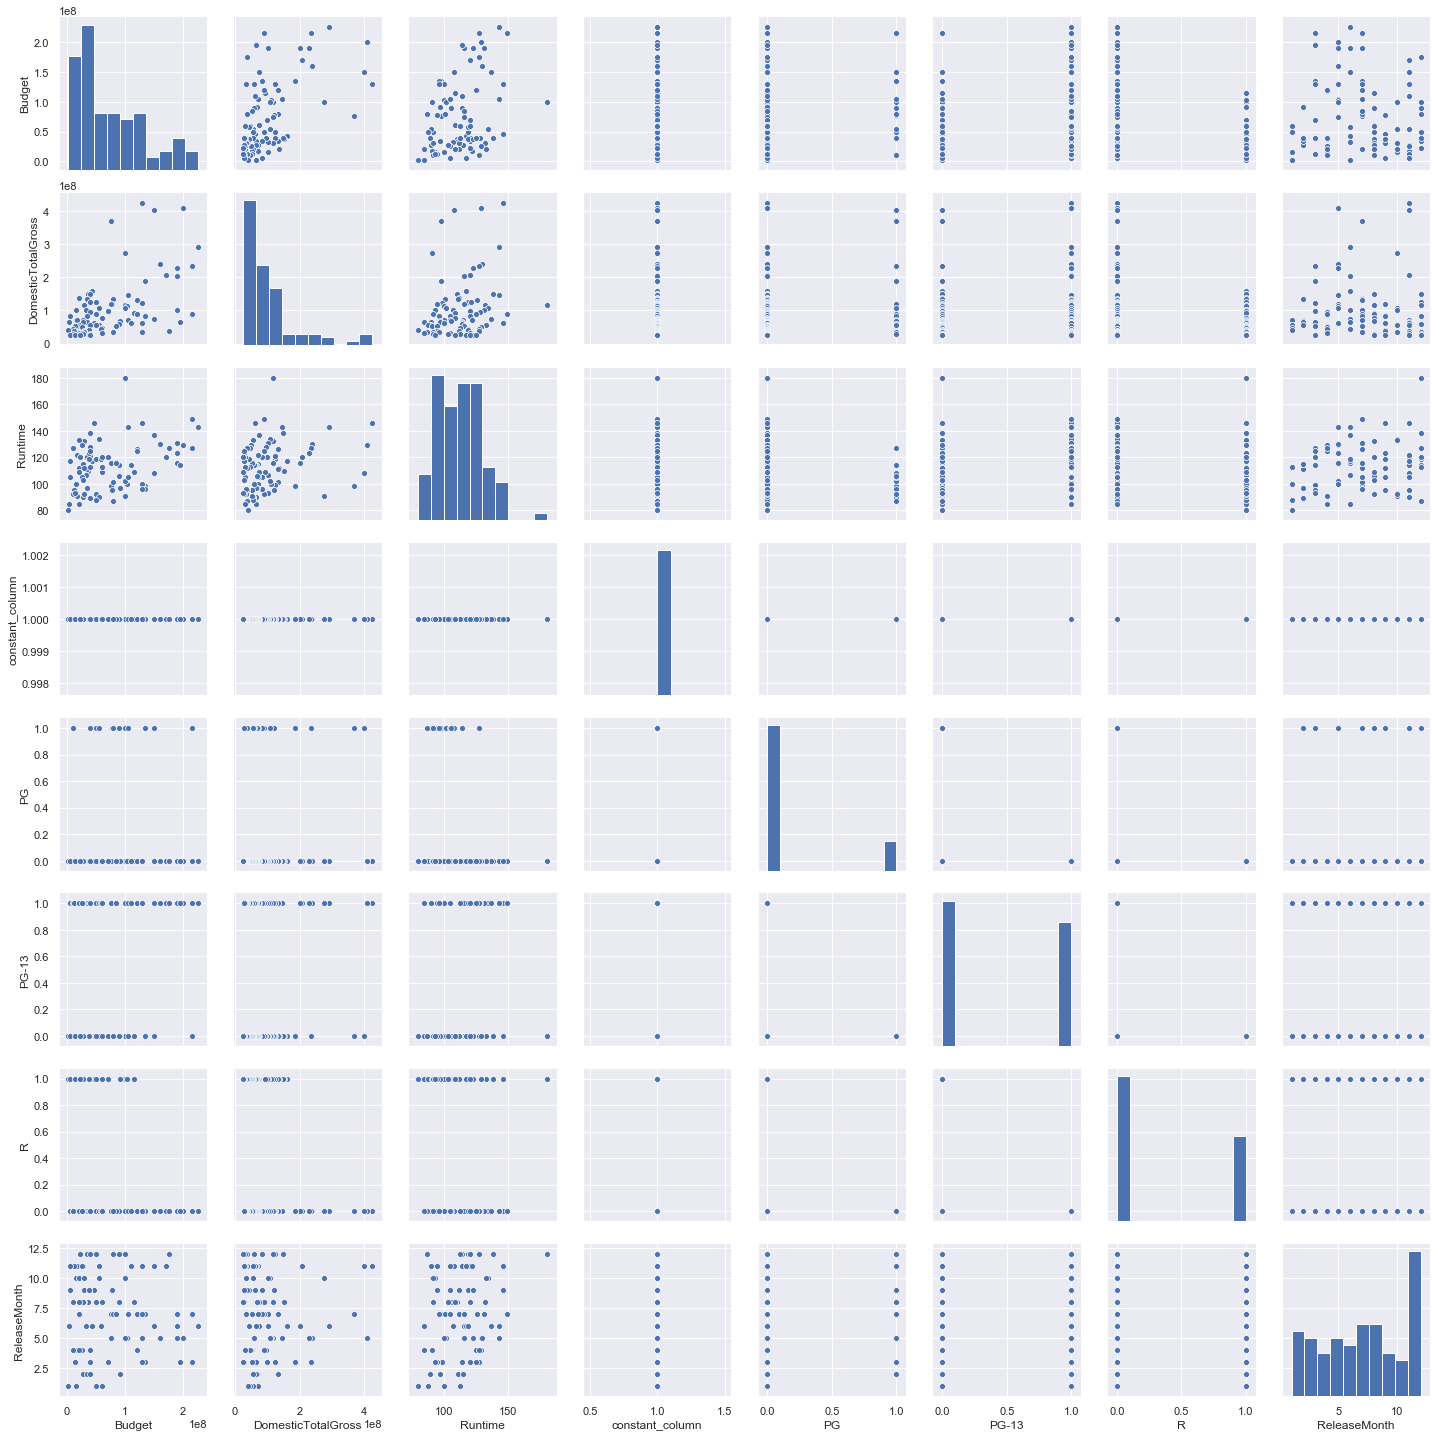

In [62]:
sns.pairplot(df);

In [63]:
df.corr()

,Budget,DomesticTotalGross,Runtime,constant_column,PG,PG-13,R,ReleaseMonth
Budget,1.000000,0.534616,0.351927,NaN,0.146205,0.341992,-0.466232,-0.071727
DomesticTotalGross,0.534616,1.000000,0.254293,NaN,0.145851,0.137675,-0.255111,0.028670
Runtime,0.351927,0.254293,1.000000,NaN,-0.319797,0.264420,-0.025022,0.208741
constant_column,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PG,0.146205,0.145851,-0.319797,NaN,1.000000,-0.416103,-0.345615,0.064782
PG-13,0.341992,0.137675,0.264420,NaN,-0.416103,1.000000,-0.709470,-0.029252
R,-0.466232,-0.255111,-0.025022,NaN,-0.345615,-0.709470,1.000000,-0.020020
ReleaseMonth,-0.071727,0.028670,0.208741,NaN,0.064782,-0.029252,-0.020020,1.000000


In [75]:
X4 = df[['Budget','Runtime','PG','PG-13','R','ReleaseMonth']]

In [76]:
lm4 = LinearRegression()
lm4.fit(X4,y)
lm4.score(X4,y)

0.3030622441682038

In [77]:
lm3.coef_

array([       0.        , 46178883.8021788 ,  4529291.27092247,
       -2575075.6990261 ,  -852904.72741702])

In [78]:
pred4 = lm4.predict(X4)

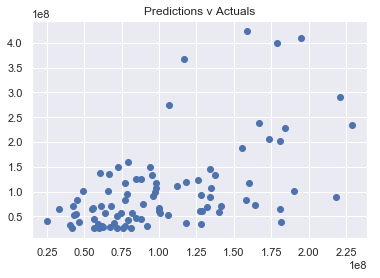

In [79]:
plt.scatter(pred4,y)
plt.title('Predictions v Actuals');

In [70]:
res4 = pred4 - y

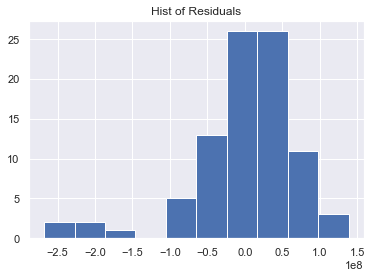

In [71]:
plt.hist(res4)
plt.title('Hist of Residuals');

In [85]:
poly = PolynomialFeatures(2,interaction_only=True)
poly_lm = LinearRegression()
poly_lm.fit(poly.fit_transform(X4),y)
poly_lm.score(poly.fit_transform(X4),y)

0.3265649056055365

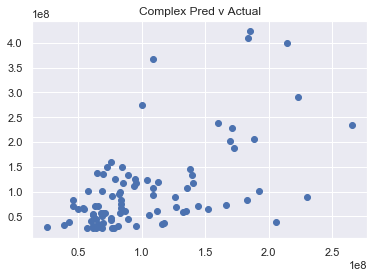

In [88]:
plt.scatter(poly_lm.predict(poly.fit_transform(X4)),y)
plt.title('Complex Pred v Actual');

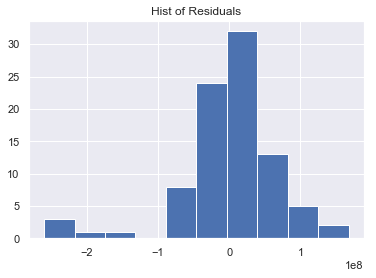

In [90]:
res5 = poly_lm.predict(poly.fit_transform(X4)) - y
plt.hist(res5)
plt.title('Hist of Residuals');

#### Challenge 5

Fitting and checking predictions on the exact same data set can be
misleading. Divide your data into two sets: a training and a test set
(roughly 75% training, 25% test is a fine split). Fit a model on the
training set, check the predictions (by plotting versus actual values)
in the test set.


In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.25)

In [98]:
model_1 = LinearRegression()
model_1.fit(X_train,y_train)
model_1.score(X_train,y_train)

0.24229947991364986

In [99]:
model_1.score(X_test,y_test)

0.5671148009703575

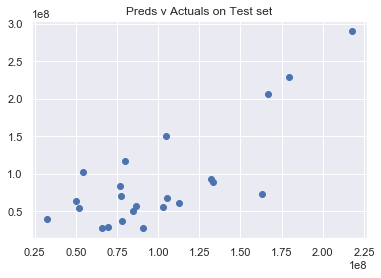

In [100]:
plt.scatter(model_1.predict(X_test),y_test)
plt.title('Preds v Actuals on Test set');

Model did pretty well on the test set but it's likely due to a lucky test sample. It even scored wrose on it's own train set.